In [62]:
import numpy as np
import pandas as pd
import pyclustering as pycl
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster import cluster_visualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pyclustering.utils import timedcall
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import draw_clusters

In [63]:
%config IPCompleter.greedy=True

In [64]:
df = pd.read_csv('C:/Users/Shobhit Agrawal/Downloads/Master Thesis/Data/iris.csv')

In [65]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to Integer**

In [66]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])

**Principal Component Analysis for Dimentionality Reduction**

In [67]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [68]:
df_3d=pca.transform(df)

In [69]:
df_3d

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

**Significance level of Dimention after PCA**

In [70]:
print(pca.explained_variance_ratio_)

[0.92264045 0.04810411 0.01829962]


In [71]:
sample = df_3d.tolist()

In [72]:
sample

[[-2.8655066941799587, 0.30278044218553335, 0.048489721083216586],
 [-2.8932133898737877, -0.1769871462954614, -0.168798182239855],
 [-3.0557490968360286, -0.16800628887325073, 0.05654241487364964],
 [-2.9212490213057016, -0.325027211241508, 0.00980010810212606],
 [-2.9067514031274237, 0.3023327236144092, 0.15372030233594347],
 [-2.4889998762241143, 0.7397271868671295, 0.2006792395863739],
 [-2.9910653468314607, -0.11673983401330126, 0.2503858210508838],
 [-2.8110529077169413, 0.15563581438173626, 0.016626848919742976],
 [-3.052480315581599, -0.5896875831557234, -0.009287332400670034],
 [-2.854701477034372, -0.11163329418724174, -0.16495585757231257],
 [-2.700856794128181, 0.6362988400049809, 0.023453589737360114],
 [-2.7978438302013897, 0.008043468006814353, 0.0899945580089967],
 [-2.960340268705976, -0.23902533286212033, -0.16705986051968502],
 [-3.3675721647873047, -0.5536865786948969, 0.09819630254772616],
 [-2.8307995477413526, 1.1465907493216034, 0.07491863437912838],
 [-2.587967

**Initialize centers using k-means++**

In [73]:
initial_centers = kmeans_plusplus_initializer(sample, 3).initialize()
initial_centers_list=[]
for center in initial_centers:
    initial_centers_list.append(center.tolist())

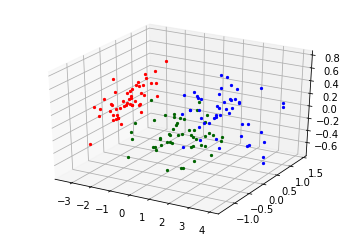

In [76]:
k_means_instance = kmeans(sample,initial_centers_list)
(ticks, result) = timedcall(k_means_instance.process)
clusters = k_means_instance.get_clusters()
centers = k_means_instance.get_centers()
draw_clusters(sample,clusters)

In [77]:
print('Execution Time: ',ticks,'Sec')

Execution Time:  0.005427944546681829 Sec


**Initial Centers Given**

In [78]:
print(initial_centers_list)

[[-2.786614993277542, 1.0570846971452046, 0.2997444995171339], [1.4798025146913272, -0.7171465989095254, 0.601680402921102], [1.022144356194018, 0.3624018662968724, -0.021133342236291597]]


In [79]:
print('Number of clusters found :'+str(len(clusters)))

Number of clusters found :3


[50, 50, 50]


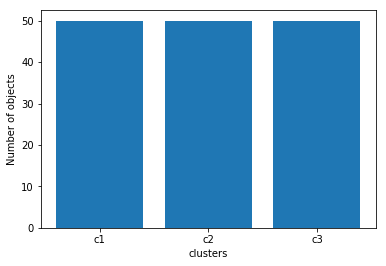

In [80]:
c=[]
for cluster in clusters:
    c.append(len(cluster))
print(c)
cluster_label=['c1','c2','c3']
plt.bar([1,2,3],height=c,tick_label=cluster_label)
plt.ylabel('Number of objects')
plt.xlabel('clusters')
plt.show()

In [81]:
sample1=pd.DataFrame(sample).values
centers_list=np.array(centers)
initial_centers_list1=np.array(initial_centers_list)

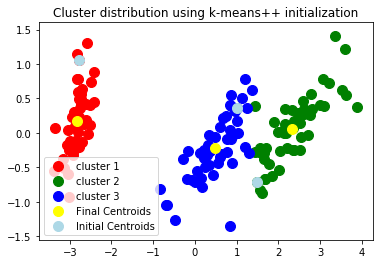

In [82]:
#Scatter plot with better cluster visualization
plt.scatter(sample1[clusters[0],0],sample1[clusters[0],1],s=100,c='red',label='cluster 1')
plt.scatter(sample1[clusters[1],0],sample1[clusters[1],1],s=100,c='green',label='cluster 2')
plt.scatter(sample1[clusters[2],0],sample1[clusters[2],1],s=100,c='blue',label='cluster 3')

#plot centers of respective new clusters
plt.scatter(centers_list[:,0],centers_list[:,1],s=100,c='yellow',label='Final Centroids')

#plot initial centers assigned to clusters
plt.scatter(initial_centers_list1[:,0],initial_centers_list1[:,1],s=100,c='lightblue',label='Initial Centroids')


plt.title('Cluster distribution using k-means++ initialization')
plt.legend()